# How do boys and girls performs across states?

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [246]:
col = pd.read_csv("dataset/nas/nas-columns.csv")
col.head()

,Name,Rename,Type
0,PQ2,Gender,Group
1,DIST,District,NaN
2,STATE,State,NaN
3,PQ3,Age,Group
4,PQ4,Category,NaN


In [247]:
label = pd.read_csv('dataset/nas/nas-labels.csv')
label

,Column,Name,Level,Rename
0,Gender,Boy,1,Boy
1,Gender,Girl,2,Girl
2,Age,12 years,2,12 years
3,Age,13 years,3,13 years
4,Age,14 years,4,14 years
5,Age,15 years,5,15 years
6,Age,16 years and above,6,16+ years
7,Age,Upto 11 years,1,11- years
8,Category,0,0,0
9,Category,1,1,1


In [248]:
data = pd.read_csv("dataset/nas/nas-pupil-marks.csv")
data.head()

,STUID,State,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
0,11011001001,AP,1,1,3,3,1,5,2,1,...,3,3,4,3,4,4,20.37,NaN,27.78,NaN
1,11011001002,AP,1,2,3,4,2,5,2,2,...,3,4,4,3,4,4,12.96,NaN,38.18,NaN
2,11011001003,AP,1,2,3,4,2,5,2,1,...,3,4,3,3,4,4,27.78,70.00,NaN,NaN
3,11011001004,AP,1,2,3,3,2,4,2,1,...,3,4,3,3,4,4,NaN,56.67,NaN,36.00
4,11011001005,AP,1,2,3,3,2,5,2,1,...,3,2,3,3,4,4,NaN,NaN,14.55,8.33


# Select needed variable

In [249]:
df = data[['State','Gender',]]

In [250]:
subject = data[['Maths %', 'Reading %', 'Science %', 'Social %']]

In [251]:
subject.head(10)

,Maths %,Reading %,Science %,Social %
0,20.37,NaN,27.78,NaN
1,12.96,NaN,38.18,NaN
2,27.78,70.00,NaN,NaN
3,NaN,56.67,NaN,36.00
4,NaN,NaN,14.55,8.33
5,NaN,23.33,NaN,30.00
6,40.74,70.00,NaN,NaN
7,NaN,26.67,NaN,22.92
8,24.07,NaN,25.45,NaN
9,18.52,26.67,NaN,NaN


In [252]:
subject['Maths %'].fillna(subject['Maths %'].mean(), inplace=True)
subject['Reading %'].fillna(subject['Reading %'].mean(), inplace=True)
subject['Science %'].fillna(subject['Science %'].mean(), inplace=True)
subject['Social %'].fillna(subject['Social %'].mean(), inplace=True)

subject.head()

E:\installed\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Maths %,Reading %,Science %,Social %
0,20.370000,46.208704,27.780000,38.357868
1,12.960000,46.208704,38.180000,38.357868
2,27.780000,70.000000,36.414637,38.357868
3,32.244413,56.670000,36.414637,36.000000
4,32.244413,46.208704,14.550000,8.330000


In [253]:
subject.max()

Maths %      100.0
Reading %    100.0
Science %    100.0
Social %      96.0
dtype: float64

# Create target variable

In [254]:
subject['Percent'] =((subject['Maths %'] + subject['Reading %'] + subject['Science %'] + subject['Social %'])/400) * 100

E:\installed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [255]:
subject.head(20)

,Maths %,Reading %,Science %,Social %,Percent
0,20.370000,46.208704,27.780000,38.357868,33.179143
1,12.960000,46.208704,38.180000,38.357868,33.926643
2,27.780000,70.000000,36.414637,38.357868,43.138126
3,32.244413,56.670000,36.414637,36.000000,40.332263
4,32.244413,46.208704,14.550000,8.330000,25.333279
5,32.244413,23.330000,36.414637,30.000000,30.497263
6,40.740000,70.000000,36.414637,38.357868,46.378126
7,32.244413,26.670000,36.414637,22.920000,29.562263
8,24.070000,46.208704,25.450000,38.357868,33.521643
9,18.520000,26.670000,36.414637,38.357868,29.990626


In [256]:
Percent  = subject[['Percent']]

In [257]:
data_frame = pd.concat([df,Percent],axis=1)

In [258]:
data_frame.head(20)

,State,Gender,Percent
0,AP,1,33.179143
1,AP,2,33.926643
2,AP,2,43.138126
3,AP,2,40.332263
4,AP,2,25.333279
5,AP,2,30.497263
6,AP,2,46.378126
7,AP,2,29.562263
8,AP,2,33.521643
9,AP,2,29.990626


In [259]:
data_frame['Gender'].replace([1,2],['Boy','Girl'],inplace=True)
data_frame.head()

,State,Gender,Percent
0,AP,Boy,33.179143
1,AP,Girl,33.926643
2,AP,Girl,43.138126
3,AP,Girl,40.332263
4,AP,Girl,25.333279


In [260]:
data_frame.groupby('Gender')['Percent'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
0,235.0,37.336580,6.954833,21.643126,32.578678,37.497263,39.661521,64.901643
Boy,89067.0,38.132290,7.342220,8.282500,32.975779,37.103126,42.213711,86.835000
Girl,96046.0,38.470242,7.450041,3.780000,33.278126,37.563126,42.858126,88.137500


In [261]:
data_frame['Gender'].value_counts(dropna=False)

Girl    96046
Boy     89067
0         235
Name: Gender, dtype: int64

In [262]:
# remove all row which contain gender as a 0

In [263]:
data_frame2 = data_frame[data2['Gender'] != 0]
data_frame2.groupby('Gender')['Percent'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Boy,89067.0,38.132290,7.342220,8.2825,32.975779,37.103126,42.213711,86.8350
Girl,96046.0,38.470242,7.450041,3.7800,33.278126,37.563126,42.858126,88.1375


In [264]:
data_frame2.head(20)

,State,Gender,Percent
0,AP,Boy,33.179143
1,AP,Girl,33.926643
2,AP,Girl,43.138126
3,AP,Girl,40.332263
4,AP,Girl,25.333279
5,AP,Girl,30.497263
6,AP,Girl,46.378126
7,AP,Girl,29.562263
8,AP,Girl,33.521643
9,AP,Girl,29.990626


In [265]:
df2 = pd.DataFrame(final.groupby(['State','Gender'])['Percent'].sum())
df2.head()

Percent
State Gender               
AN    Boy      48071.681184
      Girl     47833.843320
AP    Boy     131660.096031
      Girl    153175.383547
AR    Boy      90199.087102

In [266]:
df2.to_csv('asd')
data_frame3 = pd.read_csv('asd')
data_frame3.head(20)

,State,Gender,Percent
0,AN,Boy,48071.681184
1,AN,Girl,47833.843320
2,AP,Boy,131660.096031
3,AP,Girl,153175.383547
4,AR,Boy,90199.087102
5,AR,Girl,93244.732182
6,BR,Boy,136077.678388
7,BR,Girl,145641.051009
8,CG,Boy,131325.525223
9,CG,Girl,131559.389540


In [267]:
#final.groupby(['State','Gender'])['Percent'].count()

In [268]:
s = pd.DataFrame(final.groupby(['State','Gender'])['Percent'].count())
s.head()
s.to_csv('count.csv')
count=pd.read_csv('count.csv')
count.rename(columns={'Percent': 'Count'}, inplace=True)
cnt = count[['Count']]
cnt.head()

,Count
0,1277
1,1233
2,3608
3,4180
4,2438


In [269]:
data_frame3['Count'] = cnt['Count']
data_frame3['Performance'] = data_frame3['Percent'] / data_frame3['Count']
data_frame3.head(10)

,State,Gender,Percent,Count,Performance
0,AN,Boy,48071.681184,1277,37.644230
1,AN,Girl,47833.843320,1233,38.794682
2,AP,Boy,131660.096031,3608,36.491157
3,AP,Girl,153175.383547,4180,36.644829
4,AR,Boy,90199.087102,2438,36.997165
5,AR,Girl,93244.732182,2547,36.609632
6,BR,Boy,136077.678388,3475,39.159044
7,BR,Girl,145641.051009,3821,38.115952
8,CG,Boy,131325.525223,3509,37.425342
9,CG,Girl,131559.389540,3536,37.205710


In [270]:
data_frame3['Performance'].max()

48.893654818178874

In [271]:
data_frame3['Performance'].min()

34.170879140634746

In [272]:
data_frame3['State'].unique()

array(['AN', 'AP', 'AR', 'BR', 'CG', 'CH', 'DD', 'DL', 'DN', 'GA', 'GJ',
       'HP', 'HR', 'JH', 'JK', 'KA', 'KL', 'MG', 'MH', 'MN', 'MP', 'MZ',
       'NG', 'OR', 'PB', 'PY', 'RJ', 'SK', 'TN', 'TR', 'UK', 'UP', 'WB'], dtype=object)

Text(0.5,1,'Boys and Girls Performance by State')

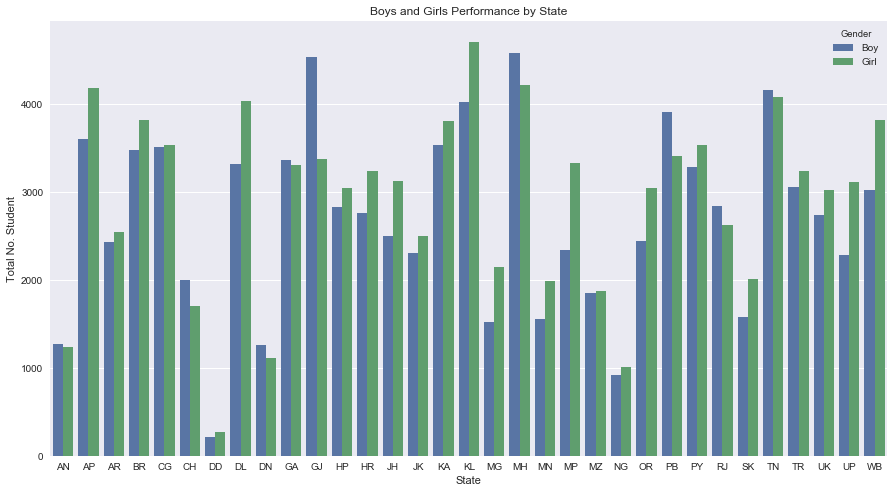

In [273]:
sns.set()
plt.rcParams['figure.figsize'] = [15,8]
sns.barplot(x='State', y='Count',hue = 'Gender', data=data_frame3 );
plt.ylabel('Total No. Student')
plt.xlabel('State')
plt.title('Boys and Girls Performance by State')